Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

     |████████████████████████████████| 2.1 MB 17.9 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-63.2.0-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=d2752b80abc3e1708e634be0f82600ed144c9078d40f8f9a180157d01b6a1928
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: b

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## AutoGluon Classifier

In [4]:
# Load in the wine dataset
wine = datasets.load_wine()

In [5]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# Include the target as well
df['target'] = wine['target']

In [17]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

df = pd.DataFrame(
    [[1, 2, 0], [3, 4, 1], [5, 6, 0], [7, 8, 1]],
    columns=["num", "amount", "target"]
)

predictor = TabularPredictor(label="target").fit(
    train_data=df,
    time_limit=60,
    presets="best_quality"
)

# output a summary of created models
predictor.fit_summary()

# evaluate best model from hyperparameter search
performance = predictor.evaluate(df)

No path specified. Models will be saved in: "AutogluonModels/ag-20220715_124920/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220715_124920/"
AutoGluon Version:  0.5.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    4
Train Data Columns: 2
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2901.98 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of avai

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetFastAI_BAG_L1       0.75       0.080221  12.778297                0.080221          12.778297            1       True          8
1      WeightedEnsemble_L2       0.75       0.080655  13.003955                0.000434           0.225657            2       True         10
2           XGBoost_BAG_L1       0.50       0.022637   3.870177                0.022637           3.870177            1       True          9
3          CatBoost_BAG_L1       0.25       0.002646   4.416053                0.002646           4.416053            1       True          5
4          LightGBM_BAG_L1       0.00       0.008999   5.576468                0.008999           5.576468            1       True          2
5        LightGBMXT_BAG_L1       0.00       0.009418   5.828673                0.00941

Evaluation: accuracy on test data: 0.75
Evaluations on test data:
{
    "accuracy": 0.75,
    "balanced_accuracy": 0.75,
    "mcc": 0.5773502691896258,
    "roc_auc": 0.75,
    "f1": 0.6666666666666666,
    "precision": 1.0,
    "recall": 0.5
}


In [9]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label = 'target').fit(train_data = df_train, time_limit =120, presets ='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220715_125023/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220715_125023/"
AutoGluon Version:  0.5.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    3
Train Data Columns: 2
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2818.67 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of ava

In [10]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     LightGBMLarge_BAG_L1   0.666667       0.006762  4.191194                0.006762           4.191194            1       True          7
1          LightGBM_BAG_L1   0.666667       0.006943  4.181633                0.006943           4.181633            1       True          2
2        LightGBMXT_BAG_L1   0.666667       0.007333  4.115733                0.007333           4.115733            1       True          1
3      WeightedEnsemble_L2   0.666667       0.007757  4.303950                0.000424           0.188217            2       True          8
4    ExtraTreesGini_BAG_L1   0.333333       0.090975  0.663968                0.090975           0.663968            1       True          5
5  RandomForestEntr_BAG_L1   0.333333       0.091254  0.715817                0.091254      

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': 0.6666666666666666,
  'LightGBM_BAG_L1': 0.6666666666666666,
  'RandomForestGini_BAG_L1': 0.3333333333333333,
  'RandomForestEntr_BAG_L1': 0.3333333333333333,
  'ExtraTreesGini_BAG_L1': 0.3333333333333333,
  'ExtraTreesEntr_BAG_L1': 0.3333333333333333,
  'LightGBMLarge_BAG_L1': 0.6666666666666666,
  'WeightedEnsemble_L2': 0.6666666666666666},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMXT_BAG_L1': 'AutogluonModels/ag-20220715_125023/models/LightGBMXT_BAG_L1/',
  'LightGBM_BAG_L1': 'Autogluon

<AxesSubplot:xlabel='model'>

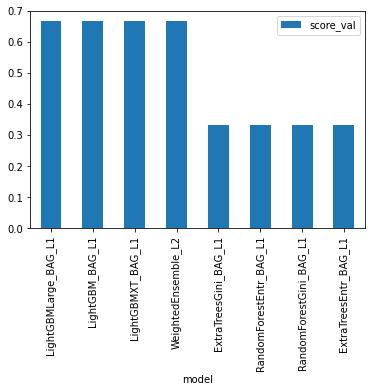

In [13]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [18]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

## AutoGluon Regression

In [19]:
# Load in the diabetes dataset
diabetes =  datasets.load_diabetes()

In [20]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

# Include the target as well
dfd['target'] = diabetes['target']

In [21]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [23]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(label = 'target', problem_type="regression", eval_metric="r2").fit(train_data = dfd_train, time_limit =120, presets ='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220715_125640/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220715_125640/"
AutoGluon Version:  0.5.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    353
Train Data Columns: 10
Label Column: target
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2542.12 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityF

In [24]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.552480       0.166335  48.352685                0.000723           0.515819            2       True         12
1        LightGBMXT_BAG_L1   0.541581       0.017544   9.529923                0.017544           9.529923            1       True          3
2          CatBoost_BAG_L1   0.522807       0.012066   9.650069                0.012066           9.650069            1       True          6
3    NeuralNetTorch_BAG_L1   0.521945       0.034628  13.185131                0.034628          13.185131            1       True         10
4          LightGBM_BAG_L1   0.514039       0.016049   9.379414                0.016049           9.379414            1       True          4
5     ExtraTreesMSE_BAG_L1   0.496684       0.185295   0.624823                0.18529

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.43970122394744415,
  'LightGBMXT_BAG_L1': 0.5415805668677733,
  'LightGBM_BAG_L1': 0.5140394842930078,
  'RandomForestMSE_BAG_L1': 0.4706085411454686,
  'CatBoost_BAG_L1': 0.5228072001429453,
  'ExtraTreesMSE_BAG_L1':

In [26]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

Evaluation: r2 on test data: 0.31066540132959464
Evaluations on test data:
{
    "r2": 0.31066540132959464,
    "root_mean_squared_error": -59.45466778002584,
    "mean_squared_error": -3534.8575208332427,
    "mean_absolute_error": -44.637027869063814,
    "pearsonr": 0.5863545024881145,
    "median_absolute_error": -32.84114074707031
}
